# Correlation + Variance
---

### Table of Content:
* [Quiz1](#Quiz1)
* [Quiz2](#Quiz2)
* [Feature Correlation & Symmetry](#CorrSymm)
* [Variation vs Dot Product](#VarDotProd)

 
### Quiz1 <a class="anchor" id="Quiz1"></a>
---
The alignment (or correlation) between two vectors is influenced by how proportional they are to each other. Let’s analyze it more formally.

### **Why (2, 4, 6) is More Correlated with (3, 5, 7) Than (1, 2, 3)?**
Consider two feature vectors:  
- $ x_1 = (1, 2, 3) $  
- $ x_2 = (2, 4, 6) $  

and the target vector:  
- $ y = (3, 5, 7) $

We suspect that $ x_2 $ has a stronger correlation with $ y $ than $ x_1 $, and we can verify it using the correlation formula:

> \$
\text{corr}(x, y) = \frac{x^T y}{\|x\| \|y\|}
\$

#### **Step 1: Compute $ x^T y $ for Each Feature**
For $ x_1 = (1, 2, 3) $:

> \$
x_1^T y = (1 \times 3) + (2 \times 5) + (3 \times 7) = 3 + 10 + 21 = 34
\$

For $ x_2 = (2, 4, 6) $:

> \$
x_2^T y = (2 \times 3) + (4 \times 5) + (6 \times 7) = 6 + 20 + 42 = 68
\$

Clearly, $ x_2^T y = 68 $ is double $ x_1^T y = 34 $, indicating a stronger raw alignment.

#### **Step 2: Compute Norms**
To normalize, compute the Euclidean norms:

> \$
\|x_1\| = \sqrt{1^2 + 2^2 + 3^2} = \sqrt{1 + 4 + 9} = \sqrt{14}
\$

> \$
\|x_2\| = \sqrt{2^2 + 4^2 + 6^2} = \sqrt{4 + 16 + 36} = \sqrt{56}
\$

> \$
\|y\| = \sqrt{3^2 + 5^2 + 7^2} = \sqrt{9 + 25 + 49} = \sqrt{83}
\$

#### **Step 3: Compute Correlation**
> \$
\text{corr}(x_1, y) = \frac{34}{\sqrt{14} \cdot \sqrt{83}} \approx 0.997
\$

> \$
\text{corr}(x_2, y) = \frac{68}{\sqrt{56} \cdot \sqrt{83}} \approx 1.000
\$

Since $ x_2 $ is a **scaled version** of $ x_1 $ (i.e., $ x_2 = 2 x_1 $), it maintains perfect proportionality with $ y $, making its correlation exactly **1.0**, while $ x_1 $ is close but not perfectly aligned.

### **Intuition**
The reason $ x_2 $ is more correlated with $ y $ than $ x_1 $ is that it follows the same linear pattern as $ y $ but with a different scale. Since correlation measures how well two vectors align (ignoring magnitude), a perfectly scaled version of $ y $ will always have **maximum correlation (1.0)**.

Recall in LASSO, **features with higher $ x^T y $ tend to be more important** because they contribute more strongly to explaining $ y $. This is why LASSO shrinks weakly correlated features toward zero while keeping strongly correlated ones.

### Quiz2 <a class="anchor" id="Quiz2"></a>
---
Consider the feature vector $ x $ and target vector $ y $:

> \$
x = (1, -1, 2, -2)
\$

> \$
y = (3, 3, -3, -3)
\$

Now, let's compute the correlation using the dot product formula.

#### **Step 1: Compute $ x^T y $**
> \$
x^T y = (1 \times 3) + (-1 \times 3) + (2 \times -3) + (-2 \times -3)
\$

> \$
= 3 - 3 - 6 + 6 = 0
\$

Since the dot product is zero, this means **there is no linear relationship between $ x $ and $ y $**.

#### **Step 2: Compute Norms (for Formality)**
> \$
\|x\| = \sqrt{1^2 + (-1)^2 + 2^2 + (-2)^2} = \sqrt{1 + 1 + 4 + 4} = \sqrt{10}
\$

> \$
\|y\| = \sqrt{3^2 + 3^2 + (-3)^2 + (-3)^2} = \sqrt{9 + 9 + 9 + 9} = \sqrt{36} = 6
\$

#### **Step 3: Compute Correlation**
> \$
\text{corr}(x, y) = \frac{x^T y}{\|x\| \cdot \|y\|}
\$

> \$
= \frac{0}{\sqrt{10} \times 6} = 0
\$

Since the correlation is **exactly zero**, $ x $ and $ y $ are **uncorrelated**.

---

### **Intuition: Why is the Correlation Zero?**
1. **Positive and Negative Contributions Cancel Each Other**  
   - The first two terms in $ x^T y $ contribute $ +3 $ and $ -3 $, which cancel out.
   - The last two terms contribute $ -6 $ and $ +6 $, which also cancel out.
   - This means **no net alignment** between $ x $ and $ y $.

2. **No Clear Linear Relationship**  
   - If we plot $ x = (1, -1, 2, -2) $ and $ y = (3, 3, -3, -3) $, we see that:
     - $ x $ switches signs frequently.
     - $ y $ also switches but in a different way.
     - There's no clear trend where increasing $ x $ would consistently increase or decrease $ y $.

3. **Geometric Interpretation**  
   - The correlation measures how much two vectors **align** in space.
   - If two vectors form a 90-degree angle, their dot product is **zero**.
   - Here, $ x $ and $ y $ behave like perpendicular directions in 4D space, meaning their correlation is zero.

---

### **Key Takeaway**
- When $ x^T y = 0 $, it means **knowing $ x $ gives no information about $ y $** in a linear sense.
- In LASSO, this would mean $ x $ is a **useless feature** and is likely set to zero.


## Understanding $ X^T X $: Feature Correlation and Symmetry  <a class="anchor" id="CorrSymm"></a>
<hr style="border:4px solid gray">

The matrix product $ X^T X $ plays a crucial role in machine learning and statistics, particularly in understanding feature relationships. Let's explore its meaning, how it represents correlation, and why it's symmetric.  

### **1. What is $ X^T X $?**  

Given a dataset represented as a matrix $ X $:  
- Each **row** is a data sample (observation).  
- Each **column** is a feature (variable).  

If $ X $ is an $ m \times n $ matrix (where $ m $ is the number of samples and $ n $ is the number of features), then:  

> \$
X^T X
\$

is an $ n \times n $ matrix where each entry is computed as:

> $
(X^T X)_{ij} = \sum_{k=1}^{m} X_{ki} X_{kj}
$

where $ X_{ki} $ and $ X_{kj} $ are the values of features $ i $ and $ j $ for data sample $ k $.  

---

### **2. How $ X^T X $ Represents Feature Correlation**  

- The **diagonal elements** $ (X^T X)_{ii} = \sum_{k=1}^{m} X_{ki}^2 $ represent the **sum of squared values** for feature $ i $. This is proportional to the **variance** of that feature (if $ X $ is mean-centered).  

- The **off-diagonal elements** $ (X^T X)_{ij} $ represent the **sum of the products** of values between feature $ i $ and feature $ j $ across all data points. This captures how strongly the two features vary together, which is related to **covariance**.  

If we normalize $ X $ by centering and scaling each feature, then $ X^T X $ becomes the **correlation matrix**, where:  

> \$
\frac{(X^T X)_{ij}}{\|X_i\| \|X_j\|}
\$

gives the Pearson correlation coefficient between feature $ i $ and feature $ j $.  

Thus, large values in $ X^T X $ indicate strong relationships between features, while small or near-zero values indicate weak or no relationships.  

---

### **3. Why $ X^T X $ is Symmetric**  

To prove symmetry, we check whether $ (X^T X)^T = X^T X $:  

> \$
(X^T X)^T = X^T (X^T)^T = X^T X
\$

Since transposing a product reverses the order but also transposes each matrix individually, and since $ (X^T)^T = X $, we get back the original $ X^T X $.  

**Intuition for Symmetry:**  
- Since $ (X^T X)_{ij} $ and $ (X^T X)_{ji} $ both compute the sum of products of the same feature pairs but in reverse order, the values are always equal.  
- This means feature $ i $'s relationship with feature $ j $ is the same as feature $ j $'s relationship with feature $ i $, making $ X^T X $ symmetric.  

---

### **4. Summary**  

- $ X^T X $ is an $ n \times n $ matrix that captures **feature-feature relationships** across all data points.  
- The diagonal elements represent the sum of squares for each feature (variance-like terms).  
- The off-diagonal elements capture the relationship between different features (covariance-like terms).  
- **Symmetry** arises because feature-feature relationships are bidirectional, meaning $ (X^T X)_{ij} = (X^T X)_{ji} $.  


## **Understanding Variance and Its Connection to the Dot Product** <a class="anchor" id="VarDotProd"></a>
<hr style="border:4px solid gray">

Variance is a measure of how much a set of values deviates from its mean. Mathematically, for a dataset $ X = (x_1, x_2, ..., x_n) $, the variance is defined as:

> \$
\text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
\$

where $ \mu $ is the mean of $ X $, given by:

> \$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
\$

---

### **Computing Variance Using the Dot Product**

To connect variance with the dot product, let’s express it in matrix-vector notation. First, rewrite variance as:

> \$
\text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} x_i^2 - \mu^2
\$

Now, represent the dataset $ X $ as a column vector:

> \$
X = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
\$

#### **Step 1: Compute the Mean Using Dot Product**
The mean $ \mu $ can be written using a dot product:

> \$
\mu = \frac{1}{n} \mathbf{1}^T X
\$

where $ \mathbf{1} $ is a column vector of ones:

> \$
\mathbf{1} = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\$

Thus, the mean can be expressed as:

> \$
\mu = \frac{1}{n} (1,1,...,1) X
\$

#### **Step 2: Compute Variance with Dot Product**
Variance can be rewritten as:

> \$
\text{Var}(X) = \frac{1}{n} (X^T X) - \mu^2
\$

Expanding $ \mu^2 $:

> \$
\mu^2 = \left(\frac{1}{n} \mathbf{1}^T X\right)^2 = \frac{1}{n^2} (X^T \mathbf{1}) ( \mathbf{1}^T X)
\$

Substituting this into the variance formula:

> \$
\text{Var}(X) = \frac{1}{n} X^T X - \frac{1}{n^2} (X^T \mathbf{1}) (\mathbf{1}^T X)
\$

This equation shows that variance can be computed using **dot products**.

---

### **Intuition Behind the Dot Product Representation**
- $ X^T X $ computes the sum of squared values.
- $ X^T \mathbf{1} $ sums all elements in $ X $, allowing computation of $ \mu $.
- The second term $ \frac{1}{n^2} (X^T \mathbf{1}) (\mathbf{1}^T X) $ adjusts for mean centering.

Thus, the variance is derived from:
- **Inner product (dot product) of a vector with itself**: $ X^T X $
- **Projection of X onto a constant vector (mean computation)**: $ X^T \mathbf{1} $

---

### **Generalization to Multivariate Case**
For a **dataset** represented as an $ n \times d $ matrix $ X $, where each row is a sample and each column is a feature:

> \$
\Sigma = \frac{1}{n} X^T X - \frac{1}{n^2} (X^T \mathbf{1}) (\mathbf{1}^T X)
\$

This is the **covariance matrix**, where the diagonal elements correspond to the variance of individual features, and the off-diagonal elements represent feature correlations.

## Pandas API for Correlation and Variance
<hr style="border:4px solid gray">

- DataFrame.corr()
- DataFrame.var()


Sample Data:
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  Feature 7
0   0.496714  -0.014154   0.482821        NaN          0  -7.439083   1.993428
1  -0.138264  -0.004206  -0.068359  -0.828995          0  -6.961946   0.723471
2   0.647689  -0.003427   0.691225  -0.828995          0  -7.223457   2.295377
3   1.523030  -0.008023   1.476107        NaN          0   2.817495   4.046060
4  -0.234153  -0.001613  -0.348505        NaN          0  -6.362398   0.531693 

Detected Non-Important Features:
Low Variance: ['Feature 2', 'Feature 4']
High Correlation: [('Feature 1', 'Feature 3'), ('Feature 1', 'Feature 7'), ('Feature 3', 'Feature 1'), ('Feature 3', 'Feature 7'), ('Feature 7', 'Feature 1'), ('Feature 7', 'Feature 3')]
High Missing Values: ['Feature 4']
Almost Uniform: ['Feature 4', 'Feature 5']


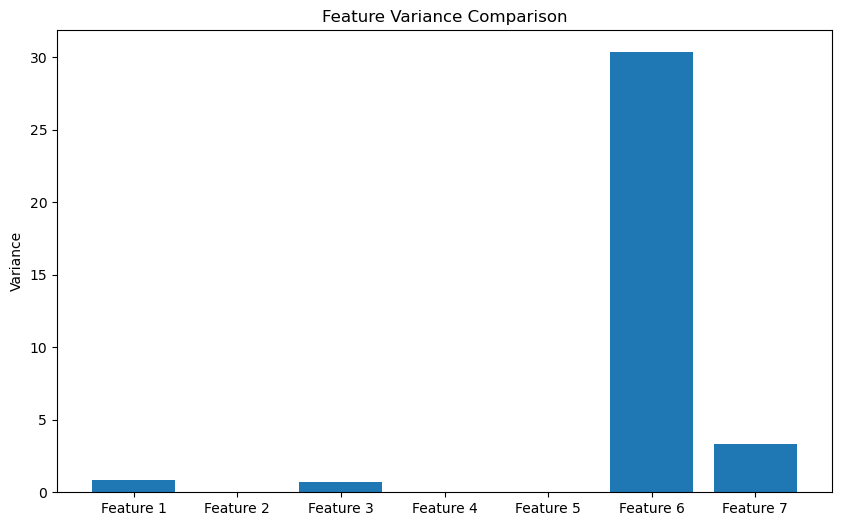

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate dataset
np.random.seed(42)
n_samples = 100

# Informative feature
feature_1 = np.random.normal(0, 1, n_samples)

# Low variance feature
feature_2 = np.random.normal(0, 0.01, n_samples)

# Strongly correlated feature
feature_3 = feature_1 * 0.9 + np.random.normal(0, 0.1, n_samples)

# Feature with high missing values
feature_4 = np.random.choice([np.nan, np.random.normal(0, 1)], size=n_samples, p=[0.8, 0.2])

# Almost uniform feature
feature_5 = np.random.choice([0, 1], size=n_samples, p=[0.99, 0.01])

# Random noise
feature_6 = np.random.uniform(-10, 10, n_samples)

# Linear combination of Feature 1
feature_7 = feature_1 * 2 + 1

# Combine into a DataFrame
data = pd.DataFrame({
    "Feature 1": feature_1,
    "Feature 2": feature_2,
    "Feature 3": feature_3,
    "Feature 4": feature_4,
    "Feature 5": feature_5,
    "Feature 6": feature_6,
    "Feature 7": feature_7
})

# Step 2: Detect non-important features
non_important_features = {}

# 1. Low variance
low_variance = data.var()[data.var() < 0.01]
non_important_features["Low Variance"] = low_variance.index.tolist()

# 2. Strong correlation
correlation_matrix = data.corr().abs()
high_corr_pairs = [
    (i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
    if i != j and correlation_matrix.loc[i, j] > 0.9
]
non_important_features["High Correlation"] = high_corr_pairs

# 3. High missing values
missing_percentage = data.isnull().mean()
high_missing = missing_percentage[missing_percentage > 0.5].index.tolist()
non_important_features["High Missing Values"] = high_missing

# 4. Almost uniform
almost_uniform = [col for col in data.columns if data[col].value_counts(normalize=True).iloc[0] > 0.95]
non_important_features["Almost Uniform"] = almost_uniform

# Step 3: Display the dataset and analysis results
print("Sample Data:")
print(data.head(), "\n")

print("Detected Non-Important Features:")
for key, value in non_important_features.items():
    print(f"{key}: {value}")

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.title("Feature Variance Comparison")
plt.bar(data.columns, data.var())
plt.ylabel("Variance")
plt.show()